In [0]:
#Gerekli Kütüphaneler
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter.csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')   #kategorik değişkenler ve bağımlı değişkenin orjinal halleri uçurulur.
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

In [10]:
df.head()  #baseball oyuncularına ilişkin veri setiydi. oyuncuları maaşları(salary), ve oynadıkları ligler, pozisyon, deneyim yılları, koşmaları vs bilgiler yer alıyor. Amaç, bütün bunları kullanılarak maaş tahmininde bulunmak.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [11]:
df.shape

(263, 20)

In [44]:
lasso_model = Lasso().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850426, tolerance: 3898.6869563806586
  positive)


In [45]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lasso_model.intercept_  #model içerisindeki sabiti almak için

-5.587450677335255

In [47]:
lasso_model.coef_ #katsayıları almak için

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [0]:
#Farklı lambda değerlerine karşılık katsayılar

In [0]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,1000,10)

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

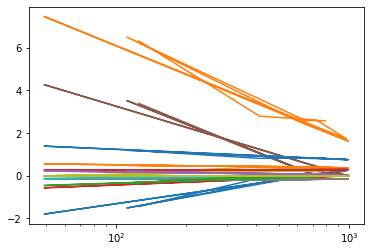

In [49]:
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

#lassonun ridgeden farklılaştığı nokta:  yeteri kadar büyük lambda değerleri olursa katasyıları sıfıra doğru yaklaştırıyordu.

In [0]:
#Eğer katsayı seti denenirse
lasso2=Lasso()
coefs2=[]
alphas2=10**np.linspace(10,-2,100)*0.5

for a in alphas2:
  lasso2.set_params(alpha=a)
  lasso2.fit(X_train, y_train)
  coefs2.append(lasso2.coef_)

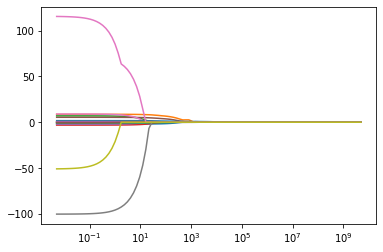

In [51]:
ax2=plt.gca()
ax2.plot(alphas2, coefs2)
ax2.set_xscale("log")
#grafikte ktasayıların sıfıra yaklaştığı görülür hatta sıfır olur. Fakat ridgete sıfır olmaz sadece yaklaşır.

**Tahmin**

In [42]:
lasso_model.predict(X_train)[0:5]  #5 tanesi için tahmin yaptırıyoruz.

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [43]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [0]:
y_pred=lasso_model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred)) #ilkel test hatası, optimize edilmemiş modelin test hatası

356.09758845540324

In [54]:
r2_score(y_test, y_pred) #bağımsız değişkenlerce bağımlı değişkendeki değişikliğin açıklanma yüzdesidir.

0.414227981323662

**Model Tuning**

In [0]:
#optimum lambda değerini bulmak için lassocv fonk kullanarak gerekli işlemler gerçekleştirilecek
lasso_cv_model=LassoCV(cv=10, max_iter=100000).fit(X_train, y_train)

In [56]:
lasso_cv_model.alpha_

563.4670501833854

In [0]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [0]:
y_pred=lasso_tuned.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.59572250697937

In [62]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64